# الفصل الثاني: معالجة اللغات الطبيعية  ‏‪ (Natural Language Processing)
في هذا الفصل سوف يتم شرح طرق عدة لبناء الخوارزميات لمعالجة اللغات الطبيعية وكيفية تحضير البيانات الخاصه لهذا النوع وشرح مفاهيم جديدة خاصه بهذا المجال وتعتبر ركائز هذا المجال ومفاهيم هامة.



هذا المجال يهتم بمعالجة اللغات الطبيعية التي يتحدثها البشر ويفسرها ويقوم بمعالجتها الى اشكال مختلفه مثلاً:
- Sentiment analysis
- Text summarization
- Speech recognition
- Question answering
- Machine translation

وغيرها الكثير... 

![](https://i.imgur.com/EySeYsR.jpg)

ملاحظة: جميع الصور الكاريكاتيريه هي من صنع خوارزمية تعلم عميق

 المصدر:  ‏‪ [Craiyon](https://www.craiyon.com/)


مصادر للقراءة بشكل اكثر عن المجال:
- [A Simple Introduction to Natural Language Processing
](https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32)


## import libraries & modules for NLP إدراج بعض المكتبات والموديلرز من أجل معالجة اللغات الطبيعية

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import random
from wordcloud import WordCloud, STOPWORDS

إدراج المكتبات التي نحتاجها في الوقت الحالي مالمن يظهر شيء نريده بلحظتها لذلك سوف نقوم بشكل مبدئي وضع هذه المكتبات بشكل أولي ونرى ماذا يحدث بعدها من إدراجات لمكتبات اخرى

المكتبات الان:
- Pandas: مكتبة تستفيد منها لمعالجة البيانات سواء نصية أو رقمية أو غيرها من الانواع الاخرى.
- tensorflow: مكتبة تساعدك على بناء خوارزميات تعلم عميق من غير الحاجة لبنائها من الصفر وفهمك لعلوم الرياضيات لايحتاج ان يكون ذو مستوى عالي فقط رياضيات من المرحلة المتوسطة كافي.
    - tensorflow.keras import layers = لإدراج طبقات المعماريات بسهولة
- matplotlib: تستخدم لرسم المقاييس بشكل بياني واشكال اخرى لتستطيع رؤية النتائج بشكل جميل
- os: موديلر خاص بالبايثون يستخدم للتعامل مع النظام التشغيلي بشكل مباشر
- random: موديلر نريد استخدامة لعرض النصوص بشكل عشوائي واشياء اخرى
- wordcloud: مكتبة خارجية لرسم سحابة الكلمات, تفيد برؤية اكثر الكلمات استخداما في البيانات التي لديك

## Prepare for Kaggle API | تجهيز البيئة من أجل تحميل البيانات من موقع كاقل

In [ ]:
# Setting kaggle environment variable directory
!pip -q install kaggle
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

نقوم بتنزيل مكتبة كاقل ‏‪من اجل تحميل البيانات المطلوبة التي نريد تصنيفها من موقعهم الخاص (Kaggle)

الخطوة الثانية: من اجل إتمام العملية بشكل تام نريد تحديد متغيرات النظام لتتمكن من معرفة أين توجد بيانات الـ اي بي اي الخاص بنا مما يتيح لنا تحميل اي بيانات نريد من موقعهم.

ملاحظة: في المسار ‏‪هو الموقع الذي حددته يمكنك تغييره بأي مسار تريد "/content/"

لكن إذا تم تغيير المسار يجب وضع ملف الـ ‏‪في المكان الذي حددته Json

مثال: لو وضعت المسار إلى ‏‪ app/kaggle/

فيجب عليك وضع ملف الـ ‏‪ Json‬في المسار الذي بالاعلى 

### Download dataset from Kaggle | تحميل البيانات باستعمال كاقل

In [ ]:
# Download the data using Kaggle API
!kaggle datasets download -d d4rklucif3r/restaurant-reviews

  0% 0.00/24.1k [00:00<?, ?B/s]
100% 24.1k/24.1k [00:00<00:00, 37.0MB/s]


هذا الكود بالكامل تم نسخة من خلال الموقع بالخطوات التاليه:

- اذهب إلى اي صفحة مجموعة بيانات تريد تنزيلها من الموقع كاقل ‏‪ (Kaggle)
- من خلال الشريط في الاعلى حيث يتواجد اسم المستخدم للشخص الذي رفع البيانات في اقصى اليمين من الشريط هنالك ثلاث نقاط عاموديه انقر عليها
- سوف تنسدل قائمة قم بالضغط على ‏‪Copy API command
- قبل لصق الامر يجب ان نضع علامة التعجب(!) في البداية لجعل جيوبتر ينتبه انه امر خاص بالنظام لينفذه
- الان يمكنك لصق الامر الذي قمت بنسخة
    - كمثل تفعيل أوامر ‏‪ Bash


In [ ]:
# Unzip the packaged data from kaggle
!unzip "restaurant-reviews.zip"

Archive:  restaurant-reviews.zip
  inflating: Restaurant_Reviews.tsv  


بعد تحميل البيانات من خلال الكود في الاعلى, الان يجب علينا فك الضغط عن هذه البيانات.

## Reading the data using pandas | قراءة البيانات باستعمال مكتبة بانداس
هذه البيانات تم استعمالها من: ‏‪ [Restaurant Reviews](https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews)

In [ ]:
# reading table data
df = pd.read_table("/content/Restaurant_Reviews.tsv")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


من خلال فحص الكلمات والجُمل بالنظر إلى إطار العمل ‏‪ (DataFrame)‬‬الذي امامنا يمكننا تفسير الأرقام كالآتي:
- 1 = أعجبهم الطعام
- 0 = لم يعجبهم الطعام

البيانات هنا كانت ايضاً بصيغة جداول ‏‪ tsv

لقد استعملنا هنا ‏‪ pd.read_table()‬بدل من ‏‪ pd.read_csv()‬

بالعادة تكون اغلب الملفات بصيغة ‏‪ csv
- CSV = Comma seprated value

مصادر للقراءة:
- [pandas read csv files](https://www.shanelynn.ie/python-pandas-read-csv-load-data-from-csv-files/)

## EDA | تحليل البيانات واستكشافها
![](https://i.imgur.com/kqzHIlc.jpg)

الأن بعد تحميل البيانات وقرائتها, يجب علينا ان نقوم باستكشاف البيانات قبل عمل بعض عمليات المعالجة على البيانات وتجريب الخوارزميات عليها

ماسوف نقوم باستكشافه هو:
- هل يوجد هنالك بيانات بقيم ‏‪Null
- كم عدد البيانات التي نملكها ؟
- هل البيانات غير متوازنه من ناحية الكلاسات؟

In [ ]:
# Check for NaN values
df.isna().sum()

Review    0
Liked     0
dtype: int64

نقوم بعمل للجداول لدينا هل هنالك قيمة فارغة ‏‪ Nan‬‬‬؟

وهدف الدالة  ‏‪ .sum()‬لكي يتم جمع القيم كلها وجمعها في نتيجة وحيدة كيف تظهر لنا المخرجات ومن ضمنها تقييم الزبائن للطعام ووصف آرائهم التي تمثل النصوص لدينا

In [ ]:
# Check for NaNs
df.isna()

,Review,Liked
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


دعونا نرى  ‏‪ .isna()‬وحدها ماذا ترجع لنا من قيم ؟ فكما نرى عبارة عن نفس الاعمده ولكن بدل من قيمها تظهر لنا قيم جديدة وهي  ‏‪ False or True‬في حالة اظهرت لنا ‏‪ False‬فمعناه انه لا توجد قيمة فارغة هنا واذا حدث عكس ذلك فيوجد قيمة فارغة هنا وهي  ‏‪ NaN‬.



In [ ]:
# Get DataFrame short describation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


وهنالك طريقة أخرى سريعة أيضاً ولديها مخرجات اخرى مثل حجم إطار العمل ‏‪ DataFrame‬في الذاكرة

ويمكننا ان نرى القيم الفارغة ‏‪ NaN‬هل تتواجد ام لا



In [ ]:
# Check how many samples
df.shape

(1000, 2)

خطوة هامة أيضاً نريد ان نرى كم لدينا من صفوف وأعمدة لدينا:
- يبدو ان لدينا 1000 سطر من الاراء لتصنيفها
     - الصفوف: كم مثال نص لدينا في البيانات
     - الاعمدة: عدد الخصائص في البيانات هذه 
        - مثال على الخصائص: ان تكون البيانات مكونه من عدة أشياء اخرى غير تقييم الطعام مثل اعمار الاشخاص وهل هم مثلا مصابين بأمراض مثل مرض السكري؟

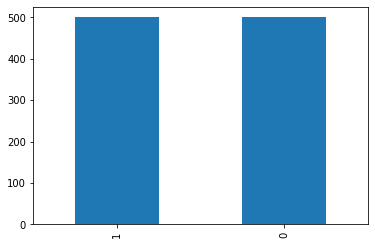

In [ ]:
# Check for class imbalances
df["Liked"].value_counts().plot(kind="bar")

بعد الرؤية بشكل سريع الأن من المنظر يبدو ان البيانات لدينا لا تعاني من مشكلة الــ ‏‪ Imbalance

ماذا تعني هذه المشكلة ؟ هذه المشكلة تؤثر سلباً عند تمرين الخوارزمية فترى امثلة كثيرة عن مثلاً ان البيانات التي نملكها الان وهي أراء الزبائن بالطعام المُقدم من المطعم. فتخيل الان انها ترى الخوارزمية كم هائل من النصوص التي تصف بمديح هذا الطعام ولكن هنالك نسبة ضئيلة بالتقييمات السلبية, هنا تحدث المشكلة وهي الخوارزمية لم ترى بالقدر الكافي من هذه التقييمات السلبية.

وهذه المشكلة نطلق عليها بالبيانات نطلق عليها ‏‪ Class imbalance

In [ ]:
# Check the exact numbers of samples
df["Liked"].value_counts()

1    500
0    500
Name: Liked, dtype: int64

كما نرى بالارقام فإن البيانات موزونه بشكل ممتاز جداً وهي ان تصبح اعداد الكلاسات متساوية ولايوجد رقم مثلا في الكلاس صفر= 500 تقييم, وكلاس اخر يملك مثلا 200  تقييم فهذه مشكلة وهنالك طرق كثيرة لحلها

مصادر للقراءة عن هذه الحلول والمشاكل:
- [How to handle imbalanced classes blog by elitedatascience](https://elitedatascience.com/imbalanced-classes)
- [How to handle imbalanced dataset by M. Farhan Tandia](https://www.linkedin.com/pulse/some-tricks-handling-imbalanced-dataset-image-m-farhan-tandia/)

### WordCloud | سحابة الكلمات

![](https://i.imgur.com/33YciTf.png)

تقنية جيدة للاطلاع على أكثر الكلمات تكراراً في الجملة وطبعاً في هذه التقنية يُفضل أن نقوم بإزالة كلمات التوقف ‏‪ (Stopwords)‬أولا قبل البدء في تنفيذ هذه التقنية والسبب راجع لكيفية عمل هذه التقنية وهو البحث عن كلمات بتكرار ضخم عن البقية. والسبب اننا نريد حذف كلمات التوقف تخيل معي ان هنالك كلمات لا تضيف لنا معنى هام في السياق وتندرج ايضاً مع الكلمات الاكثر تكراراً فتصبح لدينا رسمة لسحابة الكلمات بها العديد من المفردات غير المفهومه لسياق المشكلة التي نريد.


لكن سنقوم بتجربة هذه التقنية على هيئتان وهما:
- مع ‏‪ Stopwords
- من غير ‏‪ Stopwords

من أجل إيضاح الفرق ونرى جوهر الاثنان ولماذا من الاساس نريد حذف تلك الكلمات ‏‪ (Stopwords)

فلنبدأ بكتابة بعض الاكواد ونرى

"فبالنهاية الصور أبلغ من الكلام"

In [ ]:
# prepare text & init wordcloud 
text = df["Review"][7]
wordcloud = WordCloud().generate(text)
wordcloud

لو قمنا بشتغيل الكود في الاعلى نرى انه مازال كائن ‏‪ (Object)‬ولدية عنوان ‏‪ (Address)‬في الذاكرة

اذا وصلنا لهذه المرحلة فهذه نقطة ممتازة وهي ان سحابة الكلمات عملت وقامت بمعالجة النصوص الان نريد ان نرسمها باستعمال مكتبة ‏‪ Matplotlib‬

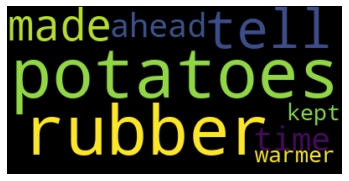

In [ ]:
# Visualize the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis(False);

بعدما قمنا بوضع الكائن الذي قمنا بإنشاءه سابقاً وقمنا باستعمال ‏‪ imshow()‬لرسمة وأيضاً نلاحظ ان هنالك  ‏‪ Argument‬أول مره نراه وهو  ‏‪ interpolation‬
يقوم بكل بساطة بتنعيم معالجة الصور 

وأخيراً  ‏‪ plt.axis(False);‬بكل اختصار تقوم بمسح الخطوط التي تظهر عند أي رسمة بيانية وتملك قُطبي ‏‪ X, y

وعلامة الفاصلة المنقوطة لكي تخفي عنوان الذاكرة الذي يظهر للرسمة, وهذا فقط من أجل الشكل لا اكثر.

In [ ]:
# Check for stopwords length & type
len(STOPWORDS), type(STOPWORDS)

(192, set)

نقوم بفحص العنصر الذي قمنا باستدعاء في تعريف المكتبات بأعلى الصفحة, وننظر هنا إلى عدد الكلمات الموجودة في عنصر كلمات التوقف ‏‪ (Stopwords)

نلاحظ ان عدد الكلمات قليلة في القائمة و لابأس بذلك يمكننا العمل بهذه القائمة.

#### Prepare cleaning stopwords for wordcloud | التجهيز لتنظيف البيانات من كلمات التوقف أو الشائعة
في هذه الفقرة سوف نعمل على حذف هذه الكلمات من البيانات التي لدينا منها


In [ ]:
# Checking how words splitted
text.split()

['The',
 'potatoes',
 'were',
 'like',
 'rubber',
 'and',
 'you',
 'could',
 'tell',
 'they',
 'had',
 'been',
 'made',
 'up',
 'ahead',
 'of',
 'time',
 'being',
 'kept',
 'under',
 'a',
 'warmer.']

الأن من أجل تجهيز النص وتقسيم الجملة إلى كلمات متقطعة نستطيع ذلك باستعمال  ‏‪ .split()

بشرط أن يكون استدعاء هذه الدالة على نوع  ‏‪ str‬وكما نرى ان العائد منها هو من نوع  ‏‪ List‬

In [ ]:
# Cleaning text from stopwords
def clean_from_stopwords(text):
    """
    Splitting the sentences to tokens(words) then cleaning those tokens if they're stopwords,
    After that return them as string after concat them again.

    Args:
    text: str type of sentences.

    Returns:
    A str object type of full cleaned sentence.
    """
    cleaned_text = text.split()
    return " ".join([word for word in cleaned_text if word not in STOPWORDS])

الان من اجل مسح الكلمات Stopwords نستطيع استعمال

List comprehension بحيث يمكننا من خلال الشرط في

- if word not in STOPWORDS: تقوم بفحص كل كلمة متقطعة وهل توجد بداخل المُتغير  ‏‪ STOPWORDS‬؟ إذا كان لا فإنها تضع الكلمة بداخل الجملة الجديدة التي نريد إنشائها وتقوم بلصقها في آخر الجملة كل كلمة جديدة مع ذكر ان هنالك مسافة بين كل كلمة جديدة كما هو موضح باستعمال

     - " ".join()

ونريد إرجاع كل جملة جديدة بعد عملية حذف كلمات التوقف ‏‪ (Stopwords)

In [ ]:
# Preprocess the text
df_cleaned = df.copy() 
df_cleaned["Review"] = df_cleaned["Review"].map(clean_from_stopwords) 
df_cleaned.head(10)

,Review,Liked
0,Wow... Loved place.,1
1,Crust good.,0
2,Not tasty texture nasty.,0
3,Stopped late May bank holiday Rick Steve recom...,1
4,The selection menu great prices.,1
5,Now I getting angry I want damn pho.,0
6,Honeslty taste THAT fresh.),0
7,The potatoes rubber tell made ahead time kept ...,0
8,The fries great too.,1
9,A great touch.,1


في أول سطر: قمنا بعمل نسخة من الاصلية لكي نقوم بالتجارب عليها قبل البدء بعمليات اخرى تأثر بتمرين الخوارزمية. وهذه من ضمن الاساسيات لأي عالم بيانات قبل البدء في عمله على بيانات معينه وهو عمل نسخة احتياطية منها.
```python
df_cleaned = df.copy()
```

---

في السطر الثاني: في أول شطر قبل استدعاء  ‏‪ .MAP()‬هو مجرد استدعاء بيانات عامود كامل والقيمة المرجعة كــ  ‏‪ Series‬

قمنا باستدعاء دالة عليه وهي التي كتبناها في الاعلى, الان ماهي آلية عمل هذه الطريقة

الان في البداية مايحدث هو شبية بعملية الــ  ‏‪ (Loop)‬ويصبح كل سطر في كل لفه يذهب الى دالة الماب ‏‪ .map()‬ويقوم باستدعاء الدالة التي قمنا بها لذلك نلاحظ في الدالة لقد كتبنا في الـ  ‏‪ (Arguments)‬النص المستدعى يأتي من أول شطر له ويقوم بمعالجة النصوص صف ويليه الصف الاخر وبعد ذلك تقوم الدالة بإرجاع الجملة الجديدة بعد التنظيف من كلمات التوقف  ‏‪ (Stopwords)‬

---
بالمختصر المفيد: كل سطر من البيانات يذهب الى الدالة وتقوم بمعالجته وارجاعه بعدها تتحدث بالقيمة الجديدة المرجعة
```python
df_cleaned["Review"].map(clean_from_stopwords)
```


In [ ]:
df_cleaned["Review"][7], df["Review"][7]

('The potatoes rubber tell made ahead time kept warmer.',
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.')


لو رأينا هنا الفارق بين الاثنين ان الذي في اليسار لايملك الكلمتان is not 

بينما في اليمين يملكها وهذه النسخة الاصلية من البيانات 

### Wordcloud without stopwords | إنشاء سحابة كلمات من غير كلمات التوقف
الان نجرب سحابة الكلمات بعد تنظيف الجُمل من الكلمات الشائعة أو كلمات التوقف

وحان الوقت لكي نجربها بكامل الجُمل الموجودة لدينا في مجموعة البيانات المخزنة في إطار البيانات  ‏‪ (DataFrame)

In [ ]:
# Try to preprocess all text
all_texts = df_cleaned["Review"]
wordcloud_2 = WordCloud().generate(all_texts)
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis(False);

TypeError: ignored

الان بعد تجهيز نفس الكود ونريد رسم سحابة الكلمات لكن ماذا نجد ؟ خطأ ومكتوب انه كان يتوقع انه يكون كائن بايت أو نص من نوع سترينق ‏‪ (str)

السبب راجع لكون ‏‪ .generate(all_texts)‬تعمل كالآتي:

- كان يتوقع ان المتغير من النوعين  ‏‪ (String & Bytes objects)‬لكن تحصل على نوع  ‏‪ (Pandas Series)‬لكن هنالك حل بسيط لهذه المشكلة دعونا نرى الكود مرة اخرى بالاسفل مع الحل وهو

- وضع النص على حده سطر يليه سطر بدل من إدراج كامل المتُغير وهو  ‏‪ (Pandas Series)‬نستطيع تحقيق ذلك عن طريق السطر
    - .generate(" ".join(all_texts))


شرح الحل: بهذه الطريقة الدالة  ‏‪.join()‬تستطيع تحويل جميع النصوص بداخل هذه سوا كانت  ‏‪ List or Series or numpy vector.

ووضعنا بين علامتين التنصيص مسافة بسبب ان كل جملة عندما نقوم بدمجها مع الاخرى الشرط هو المسافة بينهما لكي لايصبح الدمج بشكل غير مفهوم الكلمات تتداخل مع بعضها البعض في نهاية الجُمل 

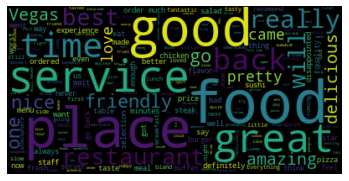

In [ ]:
# Test visualizing the entire text
all_texts = df_cleaned["Review"]
wordcloud_2 = WordCloud().generate(" ".join(all_texts))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis(False);

وهنا نلاحظ جميع الكلمات وعدد تكرارها حسب تضخم الكلمة في الرسمة الموجودة للكلمات السحابية

ونرى وجود كلمات مثل: ‏‪  food, good, place, service, great, best, restaurant.

الان من الجميل ان نرى الفرق بينهما لذلك سوف اقوم باستعمال إطار البيانات القديم ورسم الكلمات السحابية لها لنرى الفرق هل بعض الكلمات موجودة لها معنى عميق للمشكلة التي نريد حلها وهي تقييم وجبات المطعم ؟ ام لا

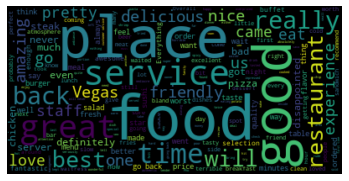

In [ ]:
# Visualizing the original DataFrame
texts_not_cleaned = df["Review"]
wordcloud = WordCloud().generate(" ".join(texts_not_cleaned))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis(False);

نلاحظ هنا بشكل طفيف هنالك عدد اكبر من الكلمات في خلف الكلمات الكبيرة على عكس الرسمة التي بالاعلى. ولكن لابأس بذلك هذه احد التقنيات لو اردت استعمالها جيدة في البيانات الكبيرة ولكن هنا تم استعمالها على بيانات ليست بتلك الضخامة وغنية بالكلمات ولكن سوف اضع بعض المقالات للاستزادة ورؤية بعض الرسمات للمقارنة وحصول على فهم اعمق بها.

مصادر للقراءة:
- [Tia Plagata blog on medium](https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214)

## Prepare Data for preprocessing | تجهيز البيانات من أجل المعالجة
![](https://i.imgur.com/zME4rx8.jpg)

الان بعد عمليات استكشاف البيانات ‏‪ (EDA)‬ورؤية اجزاء مختلفه من مجموعة البيانات ‏‪ (Dataset)‬الان حان الوقت لبدء عملية تقسيم هذه البيانات إلى مجموعات وهي:

- مجموعة التدريب ‏‪ (Training set)
- مجموعة التحقق ‏‪ (Validation set)
- مجموعة الاختبار  ‏‪ (Testing set)

ملاحظة: يمكنك تخطي خطوة أن تصنع مجموعة للتحقق ‏‪ (Validation set)‬وتكتفي فقط بمجموعتي التدريب والاختبار

وظيفة كل مجموعة:
![Table of Comparisons](https://i.imgur.com/92O2ued.png)



### Splitting data | تقسيم البيانات إلى مجموعات
خطوة مهمة قبل البدء في عملية تدريب الخوارزمية وهي تحويل النصوص هذه الى أرقام.


**سؤال**: لماذا نقوم بتحويلها إلى أرقام لماذا لا نقوم فقط بتدريب الخوارزمية على النصوص وكل كلاس مرافق لها ؟

**الجواب**: بسبب ان خوارزميات تعلم الالة يجب ان تكون مدخلاتها بصيغة أرقام

لكن قبل ذلك يجب تقسيم البيانات أولاً الى:
- نصوص وتمثل ‏‪ X
- الكلاسات المرافقة لها (0 أو 1) وتمثل ‏‪ Y
    - كما شرحت بالاعلى ماذا يعني كل كلاس.

In [ ]:
from sklearn.model_selection import train_test_split # for splitting the data into sets of train, val, test

هنا نقوم باستدعاء من مكتبة ‏‪ (Sklearn)‬ونقوم بإدراج  ‏‪ model_selection‬وندرج الدالة منها وهي مسؤوله بتقسيم البيانات الى مجموعات.

In [ ]:
# Prepare X, y for sentence & target label
X = df_cleaned["Review"].to_numpy()
y = df_cleaned["Liked"].to_numpy()

In [ ]:
# inspect X, y
X[:5], y[:5]

(array(['Wow... Loved place.', 'Crust good.', 'Not tasty texture nasty.',
        'Stopped late May bank holiday Rick Steve recommendation loved it.',
        'The selection menu great prices.'], dtype=object),
 array([1, 0, 0, 1, 1]))

قبل البدء في عملية التقسيم إلى مجموعات تدريبية وتحققيه واختبارية من الأفضل جعلها في متغيرات ‏‪ X, y‬لو اردنا التعديل عليها لاحقاً وأيضاً استخراج البيانات كصيغة مصفوفة ‏‪ Numpy‬والسبب راجع لأنه يمكنك عمل عمليات حسابية وهنالك دوال كثيرة في هذه المكتبة لذلك هذا راجع لنا بالفائدة مستقبلاً

بعد عمل المتغيرين ‏‪ X, y

يجب توضيح كم النسب التي علينا استخدامها للتقسيم ؟ هنالك مجموعة من النسب لكن سوف استخدم الان
- 80% لمجموعة التدريب
- 10% لمجموعة التحقق
- 10% لمجموعة الاختبار

ويمكنكم ايضاً لو اردتم استعمال:
- 70% لمجموعة التدريب
- 15% لمجموعة التحقق
- 15% لمجموعة الاختبار

الطريقة الان تكمن في الاكواد وكيف نفعلها ونترجم هذه المتطلبات فلنرى الكود في الاسفل

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split() — This is the original variables

# Splitting For training set
X_train, X_new, y_train, y_new = train_test_split(X,
                                                  y,
                                                  train_size=0.8,
                                                  random_state=1337,
                                                  stratify=y)

الان دعونا نفكك هذه الباراميترات وماذا يحدث في هذه الدالة:
- أول باراميتر: تم وضع مُتغير  ‏‪ X‬وهي بيانات النصوص
- ثاني باراميتر: وهي بيانات تحوي كلاس لكُل نَص 

- ثالث باراميتر train_size: وهي نسبة الاقتسام لجزئية التدريب ووضعناها 80% كما ذكرنا في الاعلى

- رابع باراميتر random_state: بسبب كيفية عمل الدالة في عملية توزيع واقتسام الاجزاء من البيانات ولجعلها عملية يمكن الجميع الحصول على نفس النتيجة التي احصل عليها الان.

- خامس باراميتر stratify: من أجل تطابق كل كلاس ولا تحدث مشكلة  ‏‪ imbalance‬لكل كلاس فتحرص على جعل كل مجموعة لديها نفس العدد من الكلاسات بعد التقسيم
    - طريقة عمله: يجب وضع قائمة الكلاسات التي تريد توزيعها بتساوي
    - مثال: لو فرضنا بعد تقسيم البيانات إلى مجموعات ووجدنا أن مجموعة التدريب لديها 54 من كلاس 0 ومجموعة التحقق لديها 150 من الكلاس 0. وهنا حدثت مشكلة الكلاس  ‏‪ imbalance‬فلذلك منعنا هذا الشيء من الحدوث باستخدام هذا الـ ‏‪ Arguments

بعد شرح كل باراميتر لماذا لا نرى متغيرات مجموعة التحقق أو مجموعة الاختبار ليسوا موجودين.

في مخرجات هذه الدالة ؟ ولماذا نرى اسم ‏‪ X_new + y_new

السبب في ذلك سوف نأخذ هذه القيم ونقوم بعملية تقسيم اخرى لكي نحصل على:
- validation مجموعة التحقق
- test مجموعة الاختبار

لكن قبل البدء في تقسيمها مره اخرى دعونا نرى هل قسمتنا للبيانات كانت بالشكل الصحيح ؟

In [ ]:
# Check the splitting ratios
print(f"Training samples: {len(X_train)} — ratio: {len(X_train) / len(X)}")
print(f"X_new samples: {len(X_new)} — ratio: {len(X_new) / len(X)}")

Training samples: 800 — ratio: 0.8
X_new samples: 200 — ratio: 0.2


كما نرى لقد تم تقسيمها بالشكل الممتاز حيث مجموعة اخذت نصيب 80% من القسمة كما كنا نريده والمتبقي هو 0.2 اي بمعنى 20% الان سوف نقسمها ونأخذ نصف الـ 20% بمعنى سوف نضع بقيمة الباراميتر الخاص بتوزيعها للتدريب 50% لأنها نسبة 20% هي نسبة كاملة هذا هو حدها الاقصى, ونصف أي نسبة مئوية هو 50%

In [ ]:
# Splitting for validation & test
X_val, X_test, y_val, y_test = train_test_split(X_new,
                                                  y_new,
                                                  train_size=0.5,
                                                  random_state=1337,
                                                  stratify=y_new)

لايوجد تغيير كبير فقط تم تغيير الباراميترات بما قمنا بتجهيزة وهي متغيرات
X_new + y_new

الان النسبه الـ 20% تم تقسيمها الى:
- 10% لمجموعة التحقق
- 10% لمجموعة الاختبار

ومن أجل التحقق من ذلك سوف نفعل كما فعلنا بالكود بالاعلى

In [ ]:
# Check the ratios for splitting
print(f"Training samples: {len(X_train)} — ratio: {len(X_train) / len(X)}")
print(f"Validation samples: {len(X_val)} — ratio: {len(X_val) / len(X)}")
print(f"Testing samples: {len(X_test)} — ratio: {len(X_test) / len(X)}")

Training samples: 800 — ratio: 0.8
Validation samples: 100 — ratio: 0.1
Testing samples: 100 — ratio: 0.1


من اجل التأكد فقط كما نرى نسب التقسيم كما كنا نريده ألا وهو
- 80% لمجموعة التدريب
- 10% لمجموعة التحقق
- 10% لمجموعة الاختبار

In [ ]:
# Check the shapes for our sets
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((800,), (800,), (100,), (100,), (100,), (100,))

In [ ]:
# Checking the dimensions for sets
X_train.ndim

1

هنا لمحة سريعة على ابعاد المجموعات لدينا وبسبب انها كلها من مصدر واحد من البيانات وطريقه المعالجة والتقسيم لم نغير بها شيء فلذلك قمنا بالتحقق من عنصر واحد وهو الـ ‏‪ X‬لمجموعة التدريب كما نرى انه ذو بُعد واحد بمعنى انه مصفوفه وحيدة الابعاد ‏‪ (Vector)

مالسبب لحرصنا على معرفه هذه المعلومات ؟ السبب راجع لطريقه بناء المدخلات الخاصه بمعماريات التعلم العميق لاحقاً 

فهنا البُعد الخاص بالبيانات التي نملكها لكل مجموعة عبارة عن اسطر عددها 1000 وهي الجمل كما نتذكر وهي ايضاً عباره عن عامود واحد فقط صحيح ؟ لأنه لايوجد سوى الجمل هذا عامود و التقييمات وهذا العامود الثاني, ولقد تم فصله بطبيعة الحال لأنه ينتمي الى العناصر التي يستطيع التعلم العميق من خلالها تقييم ومعرفه ماهو الجواب لهذه الجملة


ملاحظة مهمة: جميع التقسيمات يجب ان تكون قيمها متساوية لبعضها البعض. بمعنى أخر ان عدد القيم في المُتغير  ‏‪ X‬مساويه له في المُتغير ‏‪ Y‬

X_train == y_train

## Tokenization & Embedding | تقسيم الجُمل وتضمين الكلمات
![](https://i.imgur.com/Cop90Ff.jpg)

وأخيراً وصلنا إلى جزئية تحويل كل كلمة في المجموعات التي نملكها الى أرقام تستطيع خوارزمية التعلم العميق من إيجاد الانماط وتتعلم وتستطيع تصنيف أراء العملاء للوجبات المقدمة من المطاعم

في مجال معالجة اللغات الطبيعية يوجد مفهومان يجب التطرق لهما وهما:
- Tokenization (تفريق كلمات الجملة)
- Embedding (تمثيل للكلمة على شكل مصفوفات)

وكل مفهوم له اكثر من طريقه للاستخدام:
- Tokenization:
    - Character-level tokenization: حيث يكون كل حرف في الجملة عبارة عن  ‏‪ Token‬
        - مثال: كَتَبَ تكون "ك" 0, "ت" 1, "ب" 2 وطبعا الارقام تأتي من حروف اللغة اي بمعنى حرف الكاف لا يمثل 0 بل حسب الترتيب الابجدي لو كانت العربية من أ الى ي وتحولها الى أرقام وبعدها تمثل هذه الارقام على الاحرف في الكلمة بالنص. أي انه حرف الألف هو 0.
    - Word-level tokenization: يتم تقسيم كل كلمة في الجملة إلى عنصر ‏‪ Token‬وحيد
        - مثال: كتب محمد الدرس تصبح "كتب" هي 0  و"محمد" هو 1 و "الدرس" هو 2
    - Sub-word tokenization: هي تقنية تقسم الكلمة حسب مقطعها الصوتي.
        - مثال: لو اردنا باللغة الانجليزية نطق كلمة forget فتصبح "for" - "get" مقطعين وهنا تتحول المقطعين الى توكين كل واحد على حدى
        - مصدر للاستزادة: [مقالة جميلة لشخص استعمل هذه التقنية بمشروع](https://nbviewer.org/github/ethen8181/machine-learning/blob/master/deep_learning/subword/bpe.ipynb#Byte-Pair-Encoding-(BPE)---Handling-Rare-Words-with-Subword-Tokenization)

- Embedding:
    - إنشاء مصفوفه خاصه بك وجعلها تتدرب مع الخوارزمية للتعلم العميق وإيجاد الانماط وتحديثها مع كل إنتهاء لفه.
    - إستعمال مصفوفه منشأه مسبقاً من قبل أشخاص نشروها في المصادر الحره كالقيت هب او موقع hugging face وغيرها..


### Create Text vectorization | إنشاء كائن لتحويل الكلمات إلى أرقام
الان سوف نبدأ عملية تحويل الكلمات الى أرقام وسوف نستعمل في التحويل تقنية
- Word-level tokenization

وسوف نقوم ببناء ‏‪ Embedding‬من الصفر وندربها مع الخوارزمية التي سوف نقوم ببنائها بعد هذه العمليات.

وأيضاً سوف نشرح طريقه جديدة لم نشرحها في الفصل الأول من هذا الكتيب ألا وهي كيفية بناء النماذج للتعلم العميق باستخدام ‏‪ Functional API

لكن قبل ذلك يجب علينا إيجاد قيم بعض من المتغيرات قبل البدء وإنشاء هذه الدالة ‏‪ (TEXT VECTORIZER)‬ونشرح قيمها:
- كم حجم معجم المفردات الذي تملكه ويجب ان تكون الكلمات الفريدة وليست بالتكرار
- كم الطول الاقصى للجُمل التي لديك ؟


In [ ]:
# Inspect how many words in a sentence
[len(sentence.split()) for sentence in X_train][0]

20

من خلال الـ  ‏‪ List Comprehension‬في الاعلى نستطيع إيجاد كم عدد الكلمات الموجودة في الجملة وبهذه الطريقة نستطيع إيجاد طول كل جملة في هذه البيانات ونقسمها على عددها الكلي لإيجاد متوسط الطول للجمل لأن المتبقي سوف يتم اقتصاصه ووضع مكانه 0.

In [ ]:
# Calculate how many words in entire text rows
sum([len(sentence.split()) for sentence in X_train])

5280

من خلال تغليف كامل السطر الذي بالاعلى بدالة ‏‪ sum()

نستطيع من خلالها ايجاد اجمالي عدد الكلمات ونستطيع بعدها قسمتها على العدد بالكامل للجمل

In [ ]:
# Calculate the avg sentence length
sum([len(sentence.split()) for sentence in X_train])/len(X_train)

6.6

كما نرى لقد قسمنا جميع عدد الكلمات على اجمالي عدد الجمل التي نملك وظهر لنا رقم 6.6 لكن هنالك مشكله الدالة لاتقبل ارقام بفواصل وهذا شيء منطقي لأن عندما يتم تحويل الكلمات الى ارقام وبعدها يتم اقتصاص الزائد من الجملة لايوجد هنالك جمله سليمة لغويا تملك عدد كلمات 6.6

الحل: استعمال دالة موجودة بلغة البايثون ايضاً وهي  ‏‪ round()

سوف نغلف جميع الكود بالاعلى بالكامل وتعيين المخرج منه الى متغير جديد نسمية ‏‪ max_length

In [ ]:
# The average length of words in sentences
max_length = round(sum([len(sentence.split()) for sentence in X_train])/len(X_train))
max_length

7

ممتاز تم تقريب العدد الى 7 فيما معناه ان الدالة الان سوف تعمل على تحويل الكلمات الى ارقام وعند حصول جملة على اكثر من 7 كلمات سوف يتم اخذ فقط اول 7 كلمات والباقي يوضع مكانه اصفار

In [ ]:
# Setting sizes for hyperparameters
max_vocabulary = 1000

# Initialize text vectorizer
text_vectorizer = layers.TextVectorization(max_tokens=max_vocabulary,
                                           ngrams=None,
                                           output_mode="int",
                                           output_sequence_length=max_length)
text_vectorizer.adapt(X_train)

تم إنشاء الكلاس لتحويل النصوص إلى أرقام لكن لو نلاحظ انه تم استدعائها من  ‏‪ layers‬الخاصة بمكتبة  ‏‪ TensorFlow‬وهذا يعني انه يمكن استعمالها كطبقة في المودل.

الان سوف نشرح كل باراميتر في هذا الكلاس وماهي فائدته:
- max_tokens: كم عدد المفردات المميزة في البيانات التي لديك وعاده تأتي لو البيانات كانت ضخمة على صيغة 10 الاف, 20 الف, 30 الف كلمة وهكذا.

    - توضيح: وضعت هنا 1000 فقط لأن حجم البيانات قبل تقسيمها لمجموعات كان هذا عددها لكن تستطيعون وضع الرقم الموجود في مجموعة التدريب لكن انتبهوا يجب عليكم اضافه أشياء إضافية مثل المسافة و ‏‪ OOV

    - توكين ‏‪ OOV‬هي كلمة ليست موجودة بالبيانات التي حددتها مثلاً بالنسبة لي البيانات جميعها عبارة عن 1000 صف من الجمل سوف نواجه عند تجربة جمل ليست موجودة بهذا المعجم الصغير ذو ال1000 جملة من الكلمات. عندها سوف نتحصل على هذا التوكين.

- nrgams: وهي صيغة تحويل الكلمات هذه هل تريدها على فرد من كلمتين ؟ ام 3 كلمات وهكذا
    - توضيح: ماذا تعني قيمة ‏‪ None‬هي عند وضعها تعني انه لاتفعل شيء فقط عالج البيانات كما تأتيك (ونحن نمرر البيانات للدالة كصيغة كلمة كلمة)
- output_mode: طريقة معالجة النصوص هل تريد إخراج الكلمة بعد المعُالجة مثلا بصيغة 0,1,2 أم تريدها بصيغة [0,0,1]
    - توضيح: صيغة الـ ‏‪ Integers‬وهي صيغة الارقام العشرية, صيغة الـ ‏‪OneHot‬و هي التي نراها كأصفار والكلاس الصحيح موضوع عنده الرقم واحد
        - مثال: [0,1,0]
- output_sequence_length: طول الجملة التي تظهر بالمخرجات وهي التي حددناها بالكود الذي في الاعلى وخرج لنا رقم 7. اعلى من هذا الرقم سوف يتم اقتصاص الجملة واذا كانت اقل من 7 كلمات سوف يتم تعبئة اماكنها بالاصفار حتى تصل الى رقم 7 وهو الحد الاقصى الذي منحناه لكل جملة موجودة في هذه البيانات
    - توضيح: لماذا نريد جعل طول الجملة رقم لايتغير السبب الأول هو كي يتم معالجة البيانات في طبقات الخوارزمية يجب ان تكون سلسلة البيانات ذو بُعد واحد والسبب الاخر لو اردنا استعمالها كـ  ‏‪ Batches

- adapt: من غير هذه الدالة في لا يستطيع هذا الكائن معرفه المفردات التي يجب تحويلها. لو شبهناها في شيء فهي تشبه خوارزميات تعلم الالة مالم تدربها على البيانات لاتستطيع التصنيف.

مصادر للقراءة:
- [Tensorflow docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization)
- [Multi-label Text Classification with Keras by Usman Malik](https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/)

الان دعونا نجرب قليلاً ماذا نستطيع ان نستخرج ونرى من مخرجات هذه الدالة

In [ ]:
# Convert text to numbers
sample_sentence = "That's a bad food don't eat it!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 7), dtype=int64, numpy=array([[464, 184,  55,   4, 399,  35,  11]])>

كما نرى هذه 7 كلمات وقام هذا الكائن بتحويل النصوص بشكل ممتاز ولو كانت الجملة اقل من 7 كلمات لرأينا الاصفار واترك لكم التجربة الان لو اردتم

الان دعونا نرى المزيد من قيم التي نستطيع استخراجها من هذه الدالة

In [ ]:
# Inspect the values returned by text vectorizer
words_in_vocabulary = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocabulary[0:5]
bottom_5_words = words_in_vocabulary[-5:]
print(f"Full number of Vocabulary: {len(words_in_vocabulary)}")
print(f"top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Full number of Vocabulary: 1000
top 5 most common words: ['', '[UNK]', 'i', 'the', 'food']
Bottom 5 least common words: ['rudely', 'rubber', 'rowdy', 'round', 'rotating']


ماذا قمنا باستخراجة هنا هو اعلى 5 كلمات تكراراً واقل 5 كلمات استخداماً ويمكننا ايضاً استخراج كم عدد المفردات التي يمتلكها وهي بالطبع ماقمنا بتعريف الكلاس عليه وهي 1000 كلمة

سؤال: ماهو الشيء المكتوب كـ  ‏‪ [UNK]‬هذا يدل على ان هنالك كلمات  ‏‪ OOV(Out of vocabulary)‬وهي مشكلة شائعة تحدث عندما توجد كلمات كثيرة ليست شائعة ويكون حجم المفردات التي عرفتها بالدالة كانت رقم صغير كمثل أن نملك بيانات بحجم 1000 جملة ووضعنا الحد الاقصى للمفردات التي يستطيع احتوائها ومعالجتها هي 1000 فقط. لربما كانت هنالك كلمات ليست من ضمن الـ 1000 وهذا يحدث لأن مستحيل ان نغطي جميع مفردات اللغة فقط بـ 1000 جملة

### Create an Embedding | إنشاء كائن لتضمين الكلمات
بعد وصولنا الى هذه النقطة يمكننا الان ان ندرب الخوارزمية على هذه البيانات التي نملك وهي النصوص ولقد حولناها الى ارقام والكلاسات لكل نص موجود.

لكن لماذا نريد إنشاء تضمين الكلمات ‏‪ (Embedding)‬؟ ؟ لكن أولاً نريد قول حقيقة أنه يمكننا الان جعل الخوارزمية للتعلم العميق ان تتدرب على البيانات التي لدينا وهي مجرد نصوص تحولت الى ارقام مع كل جملة بكلاس خاص بها. لكن تخيل معي ان هنالك تقنية تسمح لك بجعل كل ترميز لكلمة تم وضعها بمصفوفه أيضاً يمكنها ان تتطور وتتدرب مع تقدم الخوارزمية بالتدريب ويصبح لديها منحنى يعبر عن تقارب كلمتين مع بعض ومعناهم هل هو قريب ام لا.

مصدر للاستزادة: 
- فيديو من قناة المهندس [هشام عاصم](https://www.youtube.com/watch?v=73QZH7Be85Y)

لذلك سوف نقوم بإنشاء تضمين كلمات من الصفر خاص بنا  ‏‪ (Embedding)

نستطيع إنشاء هذا الشيء من مكتبة ‏‪ TensorFlow‬

- [tf.keras.layers.Embedding()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)


In [ ]:
# Initialize embedding layer
embedding = layers.Embedding(input_dim=max_vocabulary,
                             output_dim=32,
                             input_length=max_length,
                             name="Embedding_B0")
embedding

ممتاز! تم إنشاء طبقة تضمين الكلمات من مكتبة ‏‪ TensorFlow‬فكما نرى تم ارجاع عنوانها في الذاكرة, الان زي ماتعودنا نشرح كل باراميتر مع بعض الامثله وفي الاخير نرى التجربة على نص حقيقي للتجريب فقط قبل ان نبني الخوارزمية وندربها.

---
شرح كل باراميتر:
- input_dim: هي حجم المفردات الخاصه بالبيانات كامله لديك وهي التي حددناها من قبل وهي 1000 جملة ولكن ايضاً يمكننا وضع الرقم بالضبط عن طريق استخدام الكائن الخاص بطبقة تحويل النصوص الى ارقام ‏‪ Text Vectorizer
‬
    - كيف تستخرج الرقم بالضبط : len(text_vectorizer.get_vocabulary())
    - طبعا لو كنت تتبع نفس المنهجية وهي وضع ارقام مضاعفات العدد ألف فيمكنك استعمال نفس المتغير المنشأ سابقاً وهو  ‏‪ (max_vocabulary)‬

- output_dim: هو حجم المصفوفه للكلمة
    - مثال: لو وضعنا الرقم 32 هذا يعني ان المصفوفه للكلمة "برتقالة" هو 32 رقم بداخلها وهكذا مع باقي الكلمات في الجملة الواحدة
    - توضيح: هذا الرقم يأتي بالتجريب وليس له قانون يتبع حسب معرفتي ولكن هنالك مقاله من غوغل وضعو بها كيفية اختيار الرقم [للاطلاع على المقاله](https://developers.googleblog.com/2017/11/introducing-tensorflow-feature-columns.html)
    - أرقام يمكنك تجربتها حسب تجاربي السابقة : 32, 64, 128, 256, 768, 1024
        - ملاحظة: احذرو من حجم البيانات لديكم وحجم الابعاد التي تضعونها في تضمين الكلمات على سبيل المثال البيانات التي نعمل عليها الان مكونه من 1000 جملة فوضعت بشكل تقريبي 32 وليس رقم كبير على سبيل المثال 300 لكي لاتحدث مشكلة فرط التخصيص ‏‪ (Overfitting)‬

- input_length: هو عدد سلسلة الكلمات التي تمر من خلال هذه الطبقة, لو تتذكرون أقصى عدد للكلمات وضعناه هو 7 حسب العمليات التي قمنا بها.
- name: أسم الطبقة لو اردت تسميه خاصه بها
    - توضيح: بعد بناء الخوارزمية واستدعاء الدالة ‏‪ .summary()‬سوف نرى أسماء كل طبقة في المعمارية التي لدينا.

#### Inspecting what embeddings output | فحص مُخرجات كائن تضمين الكلمات

In [ ]:
# Get a random sentence 
random_sample = random.choice(X_train)

# Print original text before conversion
print(f"Original text: {random_sample}")

# Embed the random sentence
embedded_text = embedding(text_vectorizer([random_sample]))

# Print converted text after conversion
print(f"Shape of embedded text: {embedded_text.shape} \nConverted text: {embedded_text}")

Original text: After disappointing dinner went elsewhere dessert.
Shape of embedded text: (1, 7, 32) 
Converted text: [[[-0.04765464 -0.04763227  0.00036535  0.0313457  -0.01733092
    0.00020907  0.03502775 -0.02268287 -0.02711328 -0.03019412
    0.00725249 -0.04892396 -0.04294168  0.04917631 -0.02782937
   -0.03574351 -0.01071206  0.0062236  -0.02915493 -0.01595285
    0.03757471 -0.0349002  -0.03450648  0.01417737  0.01391784
    0.03477761 -0.01764455  0.02849323 -0.04569986  0.02193341
   -0.01143639 -0.00044153]
  [ 0.00686746  0.01974436 -0.0114121   0.04560746  0.04215536
   -0.04676114  0.00800567  0.02502067  0.03434778  0.01473479
    0.04657396 -0.03772676  0.02254634 -0.04945636 -0.00638063
    0.02942249 -0.04962204 -0.02607812 -0.03628654 -0.03269324
   -0.03862805 -0.00720366  0.00474144 -0.02283984  0.03352724
    0.03605613 -0.02135223  0.03655081 -0.03581027 -0.02316248
    0.00225051  0.02865478]
  [-0.00334591 -0.04257112  0.04135454 -0.02891086 -0.00568647
   -0.0

أول شيء راح نعلق عليه هو ضخامة وعشوائية هذه الأرقام, هذه هي تقنية تضمين الكلمات وكما قلنا ان لكل كلمة  حجمها 32 فكما ترون هنالك قائمة بداخل قائمة اخرى مليئة بالارقام.

الان دعونا نشرح ماذا فعلنا بكل سطر:
- random.choice(X_train): هنا استخدمنا مكتبة ‏‪ Random‬من اجل جلب جملة عشوائية لدينا من مجموعة التدريب وهذا للتوضيح فقط لن يتم سحب هذه الجملة بشكل نهائي من هذه المجموعة, فقط نسخة منه وارجاع هذه النسخة في متغير جديد وضعناه.
- embedding(text_vectorizer([random_sample])): لو نرى في هذا السطر قد يتسائل البعض أو من لديه سوء فهم بالموضوع لماذا تم استعمال كائن  ‏‪ text_vectorizer‬و بداخل تضمين الكلمات ؟ الجواب بكل بساطة هذه تقنية تستخدم الأرقام وايجاد العلاقات بين الكلمات الاخرى وليست لتخزين النصوص تذكروا ليست من اجل النصوص الخام بل يجب ان تكون محوله الى أرقام.

وأيضاً نرى ان حجم هذا المتغير كالتالي:

Shape of embedded text: (1, 7, 32) 

حسناً من توقع ان رقم 32 هو الرقم الذي وضعناه كمخرجات لكل كلمة من هذه الطبقة و 7 هو حد الكلمات المسموح في الجملة التي وضعناها بطبقة تحويل النصوص الى ارقام فسأقول أحسنت, لكن ماهو رقم 1 الذي في البداية ؟

هذا راجع لسبب اننا قمنا بوضع جملة واحدة فقط لهذه الطبقة ومررناها فإذا وضعت رقم 1 بدلاله انه تلقت مدخل واحد. بمعنى لو لديك 5000 جملة وقمت بتجربتها دفعه واحدة فإذا سوف يتغير الرقم من 1 الى 5000.

شيء اخير دعونا نرى كيف نستطيع الوصول الى اول جملة ونستخرج ثاني كلمة ‏‪ (Token)‬

In [ ]:
# Check the First sentence, 2nd token
embedded_text[0][1]

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 0.00686746,  0.01974436, -0.0114121 ,  0.04560746,  0.04215536,
       -0.04676114,  0.00800567,  0.02502067,  0.03434778,  0.01473479,
        0.04657396, -0.03772676,  0.02254634, -0.04945636, -0.00638063,
        0.02942249, -0.04962204, -0.02607812, -0.03628654, -0.03269324,
       -0.03862805, -0.00720366,  0.00474144, -0.02283984,  0.03352724,
        0.03605613, -0.02135223,  0.03655081, -0.03581027, -0.02316248,
        0.00225051,  0.02865478], dtype=float32)>

بهذه الطريقة نستطيع التوصل الى اول جملة وثاني كلمة موجودة به.

سؤال بسيط: كيف عرفت انه يجب وضع 0 وبعدها رقم 1 ؟

الجواب: حسب الترتيب الذي رأيناه عندما رأينا ابعاد المتغير العائد من طبقة تضمين الكلمات ‏‪ (Embedding)‬

(1, 7, 32) ونبدأ من اليسار الى اليمين فأول خانه قلنا انها الجملة فوضعنا صفر والخانه الثانيه تمثل الكلمات في الجملة ولذلك وضعنا رقم 1, لماذا رقم 1 ؟ بسبب انه النظام يبدأ من الانديكس 0 لذلك صفر هو الانديكس 1 والخانه 2 هو الانديكس 1

ورقم 32 هو حجم المصفوفه العائده لكل كلمة وليس جملة.


الان في ختام تجهيز البيانات بشكل مبدئي ومقبول نستطيع ان نبدأ في بناء الخوارزميات وتدريبها على البيانات التي صنعناها.

ملاحظة: مفهوما تحويل النصوص و تضمين الكلمات هي حجر الاساس في معالجة اللغات الطبيعية لذلك رجاءًا لا تتسرع حتى تفهمها بشكل جيد وبعدها اكمل الجزء التالي...



## Building models | إنشاء المعماريات
والان وصلنا لفقرة بناء الخوارزميات وسوف نتمكن اخيراً من بناء المعماريات المختلفه من:
- Dense (FC Aka. Fully connected)
- LSTM (Long short-term memory)
- Bi-directional LSTM (Bidirectional long short-term memory)
- GRU (Gated recurrent units)
- Conv1D (Convolutional neural network 1 dimension)

وسوف نبدأ بها بالترتيب من اعلى القائمة الى الاسفل وسوف نرى أداء كل واحدة ونقوم بتقييمها على مقاييس مختلفه كمثل

F1, Precesion, Recall, Accuracy

الطريقة المستعمله في بناء الطبقات الان سوف تختلف عن الفصل السابق (الرؤية الحاسوبية) حيث تم استعمال طريقة  ‏‪ Sequential‬ولكن هذه المره سوف نستعمل الطريقه الاخرى وهي باستعمال ‏‪ Functional API‬و  هذه الطريقة تتيح حرية باستعمال وربط الطبقات ببعضها البعض ويمكنك توصيل طبقات كثيره بطبقه واحده.

المفتاح لفهم كيف تعمل هو "كيف يتم ربط الطبقات ببعض" إذا فهمت هذا المفهوم فسوف تسهل جميع الاشياء الاخرى لأنها تشبه بعضها ولا يوجد اختلاف كبير عن المودلات في فصل الرؤية الحاسوبية.


اطار العمل المتبع لن يختلف كثيراً ببقيه المعماريات وهي كالآتي:
- Input layer (نعرف المعمارية بحجم المدخل ونوعه)
- Text Vectorization (تحويل المدخل الى ارقام بالاعدادات التي وضعناها له)
- Embedding layer (عمل مصفوفه لكل رقم موجود لدينا اللي هي الكلمة)
- {أحد المعماريات} أو GlobalAveragePooling1D()
    - GlobalAveragePooling1D: هذه الطبقة جديده وسوف نشرح ماذا تفعل وماهي اهميتها عند بناء المعمارية .
- Output layer (Dense layer)

### Dense model | معمارية الشبكة العصبية تامة الاتصال

Model: "Model_1_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 7)                0         
 torization)                                                     
                                                                 
 Embedding_B0 (Embedding)    (None, 7, 32)             32000     
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 1)               

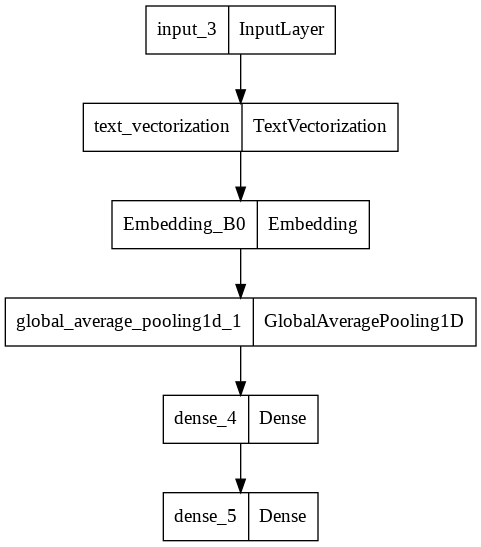

In [ ]:
# Set seed for reproducability 
tf.random.set_seed(1337)

# Create the Dense model
model_1_inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectorized = text_vectorizer(model_1_inputs)
text_embed = embedding(text_vectorized)
average_pooling = layers.GlobalAveragePooling1D()(text_embed)
fc_layer = layers.Dense(8, activation="relu")(average_pooling)
model_1_outputs = layers.Dense(1, activation="sigmoid")(fc_layer)

# Build the model
model_1 = tf.keras.Model(inputs=model_1_inputs,
                         outputs=model_1_outputs,
                         name="Model_1_Dense")

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Summary of model
model_1.summary()

# Visualize the architecture
tf.keras.utils.plot_model(model_1)

#### Fitting the model | البدء في تدريب الخوارزمية
الان سوف نُفَصِل كل جزء من الكود بالتفصيل الممل لأن باقي الكود يشبه بعضه لباقي المعماريات وتغيير طفيف فقط

قبل البدء اود ان اضع صورة توضيحية للكود بالاعلى بصورة أفضل:
![Functional API](https://i.imgur.com/mDXKoDf.gif)

لمن أراد النسخة للصورة غير المتحركة: [Functional API PNG](https://i.imgur.com/O7JxrEw.png)

---

حسنا اذا سوف نبدأ بكل سطر كود وماهي الباراميترات ولماذا وضعت بالقيم هذه

tf.random.set_seed():
- من أجل جعل النتائج لهذه التجربة قابله للاعادة لمن اراد تجربتها لاحقاً

layers.Input():
- shape: معناه المدخلات الى هذه المعمارية كيف شكله ؟ هل هو نفس الصور في السابق بأبعاد  ‏‪ (224, 224, 3)‬أم انه مجرد بُعد واحد فقط ؟ طبعا اخترنا انه بُعد واحد والسبب راجع لأن الجمل كلها سطر واحد.
    - توضيح: لماذا كتبت (,1) بهذه الصيغة السبب راجع لمكتبة  ‏‪ TensorFlow‬وطريقتها لمعالجة هذا الشيء, وهذا يدل على انه هنالك مدخل لجملة نصية واحدة
- dtype: هذا مايحدد نوع المدخل هل هو رقم ؟ ام انه نصوص, طبعاً لا احد ينسى اننا لم نحول النصوص الى ارقام بعد. لذلك عرفناها كنص

text_vectorizer():
- هنا تحدث عملية تحويل النصوص الى ارقام وهذا الشيء عرفناه بالأكواد السابقه. الجزء الاهم هنا اننا قمنا بإدراج الناتج من الطبقة الاولى الى الكائن الخاص بهذه الطبقه وهنا حدثت أول عملية ربط بين مدخل ومخرج بين طبقتين باستعمال الطريقة الجديدة ‏‪ (Functional API)‬
    - للتوضيح: لقد قمت برسم معمارية الخوارزمية بالكامل في الاسفل يمكنكم ان تروها
    - الالية بشكل مبسط: طريقة الربط تكمن في جعل مُخرج الطبقة السابقة يصبح هو مكان الـ ‏‪ Arguments‬في الطبقة التالية أو بالخارج بعد الاستدعاء للطبقة في حال كانت الطبقة لا تقبل إدخالها كـ ‏‪ Argument‬
        - مثل: GlobalAveragePooling() etc....
- embedding():
    - طبقة تضمين الكلمات  ‏‪ Embeddings‬و نمرر لها في الــ ‏‪ Arguments‬مُخرج الطبقة السابقة وهي النصوص محوله الى ارقام.

- GlobalAveragePooling1D()
    - هذه الطبقة تقوم بتقليل الابعاد الناتجة عن مخرجات الطبقات التي تسبقها ولدينا طبقة تضمين الكلمات وهي طبقة تخرج لنا قيم من 3 ابعاد كما شاهدنا من قبل عند تجريبنا لها.

        - السبب: راجع لكون طريقة عمل طبقة ‏‪ Dense‬فهي تقبل مدخلات ابعادها تكون أول خانه عبارة عن حجم الباتش وثاني خانه عبارة عن القيم بهذه الحالة بالنسبه لنا النصوص.

    - لا نستدعيها بأي ‏‪ Arguments‬فقط استدعاء من غير تعديل, ماعدا عملية وهي مخرج الطبقة السابقة نفتح أقواس ونضعه بعد تعريف هذه الطبقة ونضع بداخل الاقواس وهو مُخرج الطبقة السابقة وهكذا ربطنا مُخرج الطبقة السابقة بمُدخل الطبقة التالية.

- fc_layer = Dense():
    - طبقة تامة الاتصال ‏‪ (Fully Connected Layer)‬يمكنكم  ان لاتضعوها فلا مشكلة بذلك, لكن هدف هذه الطبقة في بعض الاحيان قبل اخر طبقة وهي المخرجات للمعمارية كاملة من اجل تعلم المزيد من الانماط وتحسين التصنيف.

- model_1_outputs = Dense():
    - اخر طبقة وهي طبقه تعمل كمخرجات هذه المعمارية كاملة.
    - عدد الخلايا التي تملكها 1 وذلك راجع لسبب المشكلة التي نريد تصنيفها كما تتذكرون كانت تقييم الطعام سيء أو جيد فقط خيارين إما هذا أو هذا.
    - نوع الـ  ‏‪ Activation‬وهو ‏‪ Sigmoid‬بسبب ان المخرج من نوع  ‏‪ Binary
        - مثال: لو كان هنالك اكثر من تقييم نريد تصنيفه لوضعنا بدلا من  ‏‪ Sigmoid‬نضع مكانه ‏‪ Softmax‬


tf.keras.Model():
- من أجل إنشاء المعمارية لابد من استدعاء هذا الكلاس ووضع مدخلاتنا ومخرجاتنا بها ولو اردت ايضا ان تعطيه اسم خاص للمودل يمكنك ذلك
    - سؤال لماذا وضعنا فقط المدخلات والمخرجات ؟
        - الجواب: هذا كما تم عمله مع جميع الطبقات اننا قمنا بربطها مع بعضها البعض بداية من المدخل حتى المخرج وبهذا وضعنا فقط المدخل والمخرج للمعمارية هذه.

الباقي تم شرحة بالفصل الخاص برؤية الحاسب وهي مقاييس المعمارية التي سوف تتبعها في قياس الخطأ وطريقة تحسين الباراميترز الخاصه بها 


In [ ]:
# Start training the model
hist_1 = model_1.fit(X_train, 
                     y_train,
                     epochs=100,
                     validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)])

Epoch 1/100
25/25 [==============================] - 1s 14ms/step - loss: 0.6918 - accuracy: 0.5025 - val_loss: 0.6896 - val_accuracy: 0.5400
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5562 - val_loss: 0.6844 - val_accuracy: 0.5800
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6488 - val_loss: 0.6759 - val_accuracy: 0.6300
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.7613 - val_loss: 0.6634 - val_accuracy: 0.6600
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.8000 - val_loss: 0.6463 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.8413 - val_loss: 0.6279 - val_accuracy: 0.6700
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.8863 - val_loss: 0.6104 - val_accuracy: 0.6600
Epoch 8/100


الان نضع كل القيم بكل ‏‪ Argument‬خاص به وليس هنالك جديد سوى شيء واحد وهو ‏‪ Callback argument‬و فائدته بكل اختصار عبارة عن دوال تعمل أثناء تدريب الخوارزمية بشرط اذا  لم يتم توقف مؤشرات هامش الخطأ مثلا.

وهنالك كثير من الدوال في هذه المكتبة  ‏‪ TensorFlow‬و لكن ماسوف نستخدمة هو

EarlyStopping(): وظيفتها مراقبه مقياس انت تحدده وعند تخطي رقم محدد توقف هذه الدالة عمل التدريب للخوارزمية لكي لا يحدث مشكلة فرط التخصيص ‏‪ (Overfitting)‬
- monitor: هنا يتم كتابة المقياس الذي تريد من هذه الدالة مراقبته اثناء تدريب الخوارزمية
- patience: هو عدد مرات تكرار الرقم الناتج من المقياس حتى يتوقف بعدها
    - مثال: لو كان رقم 3 فهذا معناه انه يتوقف تدريب الخوارزمية عند ظهور 3 نتائج من هذا المقياس تشبه بعضها
- restore_best_weights: عند تعريفه  ‏‪ True‬سوف  يقوم بإرجاع لك فقط افضل الانماط التي عثر عليها وافضل مقاييس عثر عليها وليس اخر نتيجة وصل اليها المودل(الخوارزمية) وبالغالب تكون سيئة.


### Visualize the model performance | الرسم البياني لأداء الخوارزمية

![](https://i.imgur.com/QIDzGMJ.jpg)

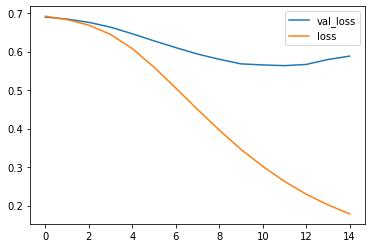

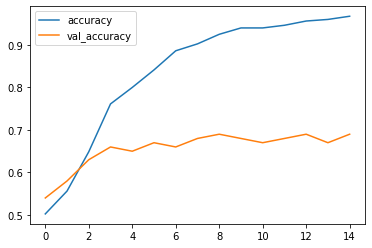

In [ ]:
# Visualize the model losses metrics
predictions_model_1 = pd.DataFrame(hist_1.history)
predictions_model_1[["val_loss", "loss"]].plot()
predictions_model_1[["accuracy", "val_accuracy"]].plot()

هنا نرى انه مقاييس الاخطاء والدقة الخاصه بالمعمارية التي قمنا بتدريبها. كما شرحنا فوائدها وكيف تعمل بالفصل السابق الخاص برؤية الحاسب لكن الفرق هنا اننا قمنا باستعمال طريقة مختصره من غير الحاجة لتعريف دالة خاصه بنا واستدعاءات من مكتبات اخرى.

الطريقة فقط نحتاج الى مكتبة  ‏‪ (Pandas)‬

pd.DataFrame(hist_1.history): كما قلنا العائد من الهيستوري هو  ‏‪ (Dictionary)‬وعند وضعه بداخل إطار بيانات  ‏‪(Pandas)‬نستطيع استخراج عامودان مع بعضهم وعمل طريقة  ‏‪ (Method Chaining)‬عليهم  وهي ‏‪ .plot()‬

[ ["val_loss", "loss"] ].plot()

### Evaluate the model with test set(Aritifical test) | تقييم أداء الخوارزمية على بيانات الاختبار

In [ ]:
# making predictions
preds = model_1.predict(X_test)
preds[0:10]

array([[0.6686722 ],
       [0.71293366],
       [0.23059589],
       [0.24490395],
       [0.92977726],
       [0.3398985 ],
       [0.25246304],
       [0.2039141 ],
       [0.34715128],
       [0.28736776]], dtype=float32)

من أجل جعل المودل لدينا يصنف الجمل من تقييمات الزبائن وهل التقييم يعبر عن اعجابهم بالطعام أم لا

يمكننا إنشاء التنبؤات (التصنيفات) من خلال الدالة  ‏‪ (Predict)‬وقمنا بإدراج مجموعة الاختبار لها في ‏‪ (Argument)

وكما نرى هنا ان الكلاسات المخرجة عبارة عن ارقام عشرية ؟؟ مالسبب هذا طبعاً عائد بسبب العملية الرياضية التي استعملناها وهي  ‏‪ (Sigmoid)‬فمخرجات هذه العملية هي احتمالات احصائية. لذلك سوف نقوم باستعمال بعض الدوال لجعل هذه الارقام من مجموعة الاعداد الصحيحة من غير فواصل.

باستعمال :
```python
tf.round & tf.squeeze()
```

In [ ]:
# Round the probs
tf.round(preds)[0:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

باستعمال التقريب  ‏‪ tf.round‬نستطيع  تقريب الاعداد مافوق 0.5 ان تصبح رقم 1 ومادون ذلك تصبح 0

In [ ]:
# Inspect the ground truth values
y_test[0:10], y_test.shape

(array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1]), (100,))

مالسبب الذي يدفعنا لفعل ذلك ؟ لأننا نريد مقارنه الكلاسات الطبيعية وهي ارقام طبيعية من غير فواصل عشرية وأيضاً نريدها ان تصبح (مصفوفه) وليست ماتريكس مثل الذي فوق لديها اكثر من بُعد اعمدة وصفوف.

لذلك سوف نستعمل tf.squeeze():

تتيح لنا حذف الابعاد الزائدة التي بالعادة تصبح برقم 1

In [ ]:
# Remove 1-D from predictions
tf.squeeze(tf.round(preds))

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)>

الان بهذا الشكل مانريده عبارة عن مصفوفه من 100 عنصر نفس الرقم لمجموعة الاختبار وكلاساتها

In [ ]:
# Create the y_preds for model predictions
y_preds = tf.squeeze(tf.round(preds))

#### Calculate other evaluation metrics | حساب بعض مقاييس الأداء الاخرى المهمة

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_eval_metrics(y_true, y_pred):
    """
    Calculate the evaluation metrics for F1 score, precesion, recall, accuracy for binary classification problem.
    in our case it's sentiment analysis

    Args:
    y_true: the ground truth labels(classes) the ones from the dataset.
    y_pred: the predicted labels the ones from model prediction.

    Returns:
    Dictionary: a dictionary of F1 score, precesion, recall, accuracy
    """

    # Calculate accuracy evaluation score
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precesion, recall, f1 score
    model_precesion, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

    return {"F1 score": model_f1,
            "Precesion": model_precesion,
            "Recall": model_recall,
            "Accuracy": model_accuracy}

طبعاً من خلال استدعاء لدالة من مكتبة  ‏‪ Sklearn
```python‬
precision_recall_fscore_support
```

هذه داله نستطيع منها استخراج اهم 3 مقاييس وبكل اختصار هي:
- F1 score: مقياس يضم المقياسان ‏‪ (Precesion & Recall)‬وايحاج المتوسط لهم
- Precesion: هذا المقياس بكل اختصار عندما يعتقد المودل انه تنبأ بكلاس 1 وهو في الحقيقه كلاس 0
- Recall: وهذا المقياس بكل اختصار يعتقد انه تنبأ بكلاس 0 وهو الكلاس الحقيقي 1

السبب ان هنالك متغير بهذا الاسم (_) يعود لأننا لانريده وهو  ‏‪ (Support)‬ويمثل  عدد مرات ظهور الكلاس الصحيح.

وهنالك  ‏‪ Argument

average="weighted" 

وهو جعل النتائج العائدة بصيغة ارقام وايجاد متوسطهم.
- اذا لم تضعها فسوف تعود النتائج كمصفوفات



In [ ]:
# Calculate the model metrics
calculate_eval_metrics(y_true=y_test,
                       y_pred=y_preds)

{'F1 score': 0.7694235588972431,
 'Precesion': 0.7727272727272728,
 'Recall': 0.77,
 'Accuracy': 77.0}